# Projects - Gender Prediction

In [ ]:
import nltk
import random

In [ ]:
from nltk.corpus import names

In [ ]:
import nltk
nltk.download('names')
names.fileids()

[nltk_data] Downloading package names to /root/nltk_data...
[nltk_data]   Unzipping corpora/names.zip.


['female.txt', 'male.txt']

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

In [ ]:
cfd = nltk.ConditionalFreqDist((fileid,name[-2:]) for fileid in names.fileids() for name in names.words(fileid))

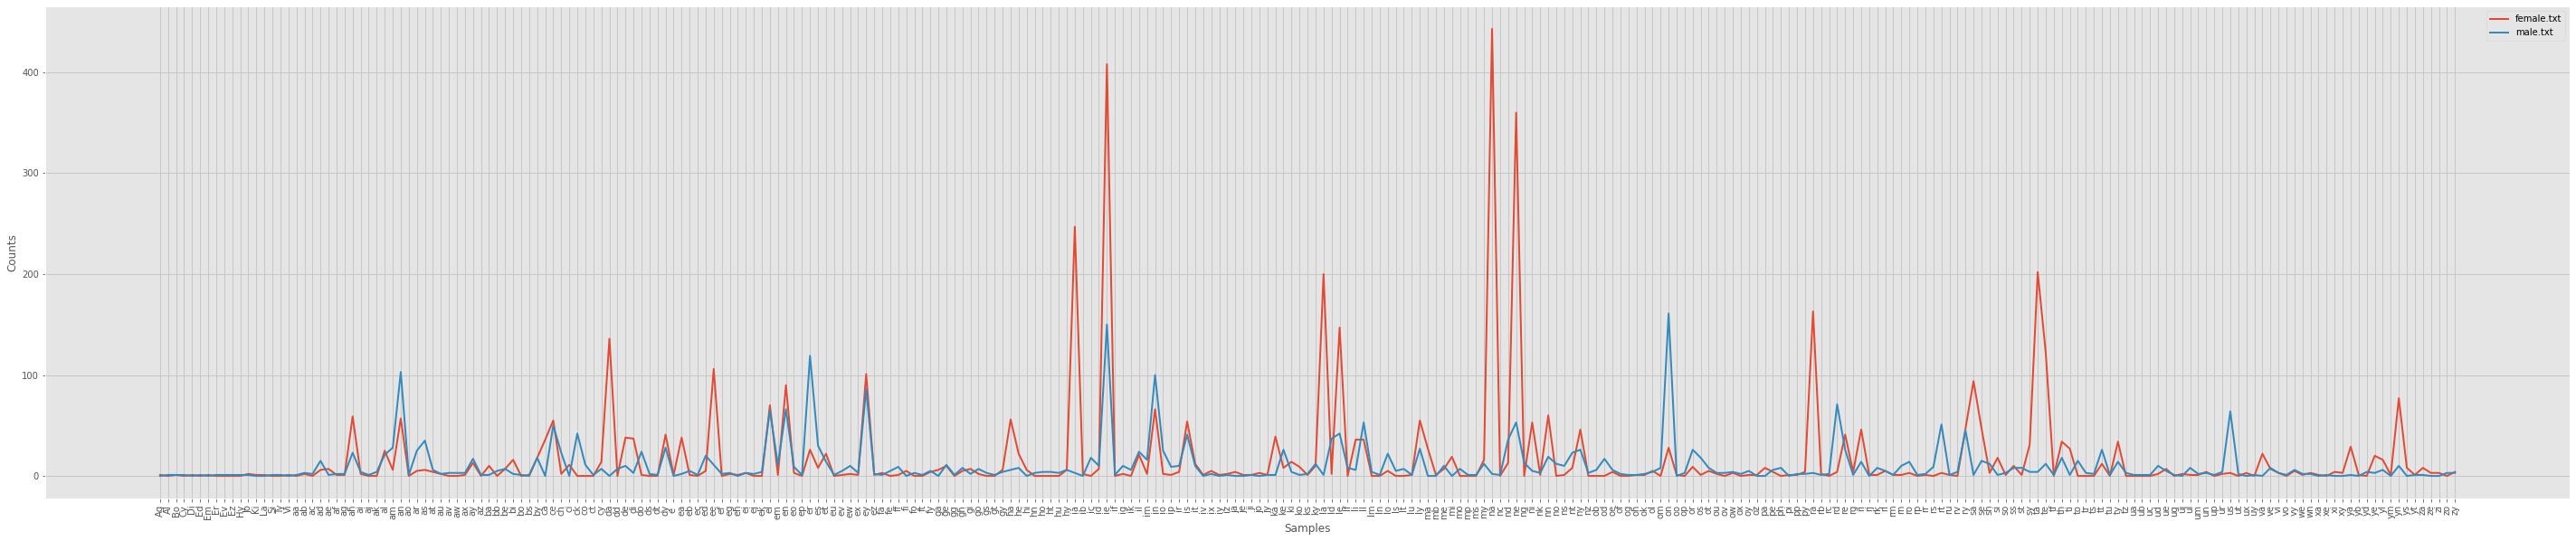

In [ ]:
plt.figure(figsize=(50,10))
cfd.plot()

The plot shows us that a decent numbner of ending letter pairs have tend to lean towords female or male names.  Let's use this as our feature to build a feature set.

In [ ]:
def name_feature(name):
    return {'pair': name[-2:]}

In [ ]:
name_feature("Katy")

{'pair': 'ty'}

In [ ]:
name_list = ([(name, 'male') for name in names.words('male.txt')] + [(name, "female") for name in names.words('female.txt')])

In [ ]:
name_list[:10]

[('Aamir', 'male'),
 ('Aaron', 'male'),
 ('Abbey', 'male'),
 ('Abbie', 'male'),
 ('Abbot', 'male'),
 ('Abbott', 'male'),
 ('Abby', 'male'),
 ('Abdel', 'male'),
 ('Abdul', 'male'),
 ('Abdulkarim', 'male')]

In [ ]:
name_list[-10:]

[('Zonnya', 'female'),
 ('Zora', 'female'),
 ('Zorah', 'female'),
 ('Zorana', 'female'),
 ('Zorina', 'female'),
 ('Zorine', 'female'),
 ('Zsa Zsa', 'female'),
 ('Zsazsa', 'female'),
 ('Zulema', 'female'),
 ('Zuzana', 'female')]

In [ ]:
random.shuffle(name_list)

In [ ]:
name_list[:10]

[('Shannon', 'female'),
 ('Wendall', 'male'),
 ('Noelle', 'female'),
 ('Eleanor', 'female'),
 ('Linnet', 'female'),
 ('Rem', 'male'),
 ('Dinnie', 'female'),
 ('Randi', 'male'),
 ('Kessiah', 'female'),
 ('Dodie', 'female')]

In [ ]:
features = [(name_feature(name), gender) for (name,gender) in name_list]

In [ ]:
features[:10]

[({'pair': 'on'}, 'female'),
 ({'pair': 'll'}, 'male'),
 ({'pair': 'le'}, 'female'),
 ({'pair': 'or'}, 'female'),
 ({'pair': 'et'}, 'female'),
 ({'pair': 'em'}, 'male'),
 ({'pair': 'ie'}, 'female'),
 ({'pair': 'di'}, 'male'),
 ({'pair': 'ah'}, 'female'),
 ({'pair': 'ie'}, 'female')]

In [ ]:
len(features)/2

3972.0

In [ ]:
training_set = features[:3972]
testing_set = features[3972:]

We can use the Naive Bayes Classifier to train our model. https://en.wikipedia.org/wiki/Naive_Bayes_classifier

In [ ]:
classifier = nltk.NaiveBayesClassifier.train(training_set)

In [ ]:
male_names = names.words('male.txt')
"Carmello" in male_names

False

In [ ]:
classifier.classify(name_feature("Carmello"))

'male'

In [ ]:
nltk.classify.accuracy(classifier, testing_set)

0.7746727089627392